Day 2 of Advent of Code 2021. Import packages, etc.

In [26]:
from aocd import get_data
import pandas as pd

day2 = get_data(day=2,year=2021)

day2[:10]

'forward 9\n'

In [27]:
df = pd.DataFrame([i.split() for i in day2.split('\n')],columns=['dir','value'])
df.value = pd.to_numeric(df.value)

df.head()

,dir,value
0,forward,9
1,down,9
2,down,6
3,up,2
4,down,5


In [28]:
df.groupby('dir').sum()

,value
dir,
down,1798
forward,2199
up,1012


In [29]:
df[df.dir=='down'].value.sum() - df[df.dir=='up'].value.sum()

786

In [30]:
(df[df.dir=='forward'].value.sum()-df[df.dir=='backward'].value.sum()) * (df[df.dir=='down'].value.sum() - df[df.dir=='up'].value.sum())

1728414

On to part 2!

Calculate the change in aim for each up and down

In [31]:
df['d_aim'] = (df.dir=='down')*(df.value) - (df.dir=='up')*(df.value)
df['aim'] = df.d_aim.cumsum()

Calculate the horizontal position, change in depth, and depth

In [32]:
df['hz'] = ((df.dir=='forward')*(df.value)).cumsum()
df['d_depth'] = (df.dir=='forward')*(df.value)*(df.aim)
df['depth'] = df.d_depth.cumsum()

In [33]:
df.hz.iloc[-1] * df.depth.iloc[-1]

1765720035

That's the answer!

Do some basic dataviz just because

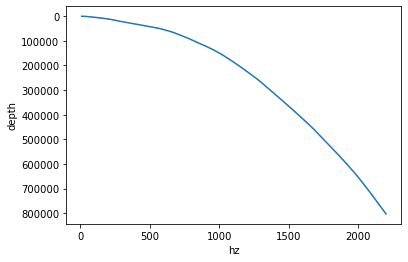

In [34]:
import seaborn as sns
sns.lineplot(data=df,x='hz',y='depth').invert_yaxis()